In [1]:
import sys
sys.path.append(r'C:\AIBOOTCAMP\DemoFinalProject')

# Import the DataClean module
import DataClean

# Access the DataFrame
df = DataClean.df_sorted_multi


C:/AIBOOTCAMP/DemoFinalProject/cleanedAnaTEST.xlsx
                 id  accommodates  bathrooms  bedrooms         beds  \
count  7.578000e+03   7578.000000     7578.0    7578.0  7578.000000   
mean   3.548449e+17      6.932040        0.0       0.0     4.315651   
std    4.016178e+17      3.846569        0.0       0.0     3.724811   
min    6.422000e+03      1.000000        0.0       0.0     0.000000   
25%    3.470407e+07      4.000000        0.0       0.0     2.000000   
50%    5.279653e+07      6.000000        0.0       0.0     3.000000   
75%    7.619215e+17     10.000000        0.0       0.0     6.000000   
max    1.045581e+18     16.000000        0.0       0.0    40.000000   

          latitude    longitude  maximum_nights  review_scores_rating  \
count  7578.000000  7578.000000     7578.000000           7578.000000   
mean     36.163372   -86.770569      500.188704              4.832637   
std       0.039209     0.049932      437.836674              0.221097   
min      35.98489

In [1]:
import os
import sys
import numpy as np
import gradio as gr
import pandas as pd
from IPython.display import HTML 
import pandas as pd
from datetime import datetime, timedelta
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os
import openai
# Additional imports for agent with built-in tools.
from langchain_openai import ChatOpenAI
from langchain.agents import initialize_agent, load_tools
# Load environment variables.
load_dotenv()

# Set the model name for our LLMs.
OPENAI_MODEL = "gpt-3.5-turbo"
# Store the API key in a variable.
#OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


current_date = datetime.now()
formatted_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")
dest_dir = './Sihong Zhou/'
file_name = f"Download{formatted_date}.csv"
file_nameUnique=f"BNBDailyAna.csv"
file_nameDP = f"dpDownload{formatted_date}.csv"
file_valid_stockDF=f"Valid{formatted_date}.csv"
file_dailyAna=f"dailyAna{formatted_date}.csv"
full_pathTest=f"cleanedAnaTEST.xlsx"
full_Rank=f"RankedDATA.xlsx"
cleanedAna=f"cleanedAna{formatted_date}.csv"

In [2]:
api_key = os.environ.get("API_KEY")
OPENAI_API_KEY=os.environ.get("OPENAI_API_KEY")
google_api=os.environ.get("GOOGLE_API")
database_url = os.environ.get("please replace this with your own path")

1.Data Model : Pick the one

In [3]:

fileListing=pd.read_csv('../m.c-squared-3/Sihong Zhou/listings.csv')
fileListing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
file_to_modify=fileListing[['id', 'listing_url', 'last_scraped', 'neighborhood_overview',
       'host_name','host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood','neighbourhood_cleansed',
       'neighbourhood_group_cleansed',  
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds','amenities', 
       'price','latitude',
       'longitude', 
       'minimum_nights',
       'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
       ]]

In [5]:
file_to_modify.head()

,id,listing_url,last_scraped,neighborhood_overview,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,longitude,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,6422,https://www.airbnb.com/rooms/6422,2023-12-19,Historic East Nashville is home to many new an...,Michele,NaN,NaN,0%,f,NaN,...,-86.73570,30,365,4.95,4.94,4.96,4.97,4.96,4.92,4.98
1,39870,https://www.airbnb.com/rooms/39870,2023-12-19,"The house is in a safe, quiet, ""college"" neig...",Evelyn,within an hour,100%,95%,t,NaN,...,-86.81269,1,1125,4.93,4.94,4.92,4.98,4.97,4.93,4.92
2,59576,https://www.airbnb.com/rooms/59576,2023-12-19,We live on a cul-de-sac in a small community o...,Patricia And John,within an hour,100%,96%,t,South Miami Heights,...,-86.59162,30,90,4.50,5.00,3.50,5.00,5.00,5.00,5.00
3,72906,https://www.airbnb.com/rooms/72906,2023-12-19,Historic Belmont-Hillsboro neighborhood. Walk-...,Richard,within an hour,100%,100%,t,NaN,...,-86.80066,2,7,4.92,4.90,4.82,4.98,4.99,4.97,4.89
4,258817,https://www.airbnb.com/rooms/258817,2023-12-19,"I'm very near the Percy Priest Lake, natural ...",Diana,within an hour,100%,100%,f,NaN,...,-86.59151,30,365,4.77,4.81,4.40,4.92,4.90,4.74,4.73


In [6]:
import csv
from openpyxl import Workbook

def csv_to_excel(csv_file, excel_file):
    wb = Workbook()
    ws = wb.active

    with open(csv_file, 'r') as f:
        for row in csv.reader(f):
            ws.append(row)

    wb.save(excel_file)

In [7]:
csvfile=file_to_modify.to_csv(dest_dir+file_nameUnique)
PathExcel=dest_dir+full_pathTest

In [8]:
execelFile=file_to_modify.to_excel(PathExcel, sheet_name='MySheet', index=False)


In [9]:
# Load your Excel file
df = pd.read_excel(PathExcel)

# Remove duplicate rows, considering all columns
df_unique = df.drop_duplicates()
   

In [10]:

print(PathExcel)

C:/AIBOOTCAMP/DemoFinalProject/cleanedAnaTEST.xlsx


In [11]:
final_path='./Sihong Zhou/UpdatedAna.xlsx'

In [12]:

df_unique.to_excel(final_path, sheet_name='Unique', index=True)

In [13]:
anaD=pd.read_excel(final_path,sheet_name='Unique')
anaD.head()

,Unnamed: 0,id,listing_url,last_scraped,neighborhood_overview,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,longitude,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,6422,https://www.airbnb.com/rooms/6422,2023-12-19,Historic East Nashville is home to many new an...,Michele,NaN,NaN,0%,f,...,-86.73570,30,365,4.95,4.94,4.96,4.97,4.96,4.92,4.98
1,1,39870,https://www.airbnb.com/rooms/39870,2023-12-19,"The house is in a safe, quiet, ""college"" neig...",Evelyn,within an hour,100%,95%,t,...,-86.81269,1,1125,4.93,4.94,4.92,4.98,4.97,4.93,4.92
2,2,59576,https://www.airbnb.com/rooms/59576,2023-12-19,We live on a cul-de-sac in a small community o...,Patricia And John,within an hour,100%,96%,t,...,-86.59162,30,90,4.50,5.00,3.50,5.00,5.00,5.00,5.00
3,3,72906,https://www.airbnb.com/rooms/72906,2023-12-19,Historic Belmont-Hillsboro neighborhood. Walk-...,Richard,within an hour,100%,100%,t,...,-86.80066,2,7,4.92,4.90,4.82,4.98,4.99,4.97,4.89
4,4,258817,https://www.airbnb.com/rooms/258817,2023-12-19,"I'm very near the Percy Priest Lake, natural ...",Diana,within an hour,100%,100%,f,...,-86.59151,30,365,4.77,4.81,4.40,4.92,4.90,4.74,4.73


In [14]:
anaD.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'last_scraped',
       'neighborhood_overview', 'host_name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'latitude', 'longitude', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [15]:
CleanedData= pd.read_excel(final_path, usecols=['id','listing_url','host_response_rate', 'host_acceptance_rate','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price',
       'latitude', 'longitude','maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
CleanedData.fillna(0, inplace=True)
CleanedData.head()

,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,latitude,longitude,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,6422,https://www.airbnb.com/rooms/6422,0,0%,1,0.0,0.0,1.0,$43.00,36.17143,-86.73570,365,4.95,4.94,4.96,4.97,4.96,4.92,4.98
1,39870,https://www.airbnb.com/rooms/39870,100%,95%,2,0.0,0.0,1.0,$70.00,36.12466,-86.81269,1125,4.93,4.94,4.92,4.98,4.97,4.93,4.92
2,59576,https://www.airbnb.com/rooms/59576,100%,96%,1,0.0,0.0,1.0,$42.00,36.18940,-86.59162,90,4.50,5.00,3.50,5.00,5.00,5.00,5.00
3,72906,https://www.airbnb.com/rooms/72906,100%,100%,2,0.0,0.0,2.0,$90.00,36.13122,-86.80066,7,4.92,4.90,4.82,4.98,4.99,4.97,4.89
4,258817,https://www.airbnb.com/rooms/258817,100%,100%,2,0.0,0.0,2.0,$38.00,36.16076,-86.59151,365,4.77,4.81,4.40,4.92,4.90,4.74,4.73


In [16]:
filtered_df = CleanedData[(CleanedData['review_scores_rating'] > 3) & (CleanedData['review_scores_accuracy'] >3)& (CleanedData['review_scores_value'] >3)]
#&CleanedData['is_valid']=='True'

In [17]:
filtered_df=filtered_df.dropna(subset=['price'])

filtered_df.head()

,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,latitude,longitude,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,6422,https://www.airbnb.com/rooms/6422,0,0%,1,0.0,0.0,1.0,$43.00,36.17143,-86.73570,365,4.95,4.94,4.96,4.97,4.96,4.92,4.98
1,39870,https://www.airbnb.com/rooms/39870,100%,95%,2,0.0,0.0,1.0,$70.00,36.12466,-86.81269,1125,4.93,4.94,4.92,4.98,4.97,4.93,4.92
2,59576,https://www.airbnb.com/rooms/59576,100%,96%,1,0.0,0.0,1.0,$42.00,36.18940,-86.59162,90,4.50,5.00,3.50,5.00,5.00,5.00,5.00
3,72906,https://www.airbnb.com/rooms/72906,100%,100%,2,0.0,0.0,2.0,$90.00,36.13122,-86.80066,7,4.92,4.90,4.82,4.98,4.99,4.97,4.89
4,258817,https://www.airbnb.com/rooms/258817,100%,100%,2,0.0,0.0,2.0,$38.00,36.16076,-86.59151,365,4.77,4.81,4.40,4.92,4.90,4.74,4.73


In [18]:
print(filtered_df.describe())

                 id  accommodates  bathrooms  bedrooms         beds  \
count  7.578000e+03   7578.000000     7578.0    7578.0  7578.000000   
mean   3.548449e+17      6.932040        0.0       0.0     4.315651   
std    4.016178e+17      3.846569        0.0       0.0     3.724811   
min    6.422000e+03      1.000000        0.0       0.0     0.000000   
25%    3.470407e+07      4.000000        0.0       0.0     2.000000   
50%    5.279653e+07      6.000000        0.0       0.0     3.000000   
75%    7.619215e+17     10.000000        0.0       0.0     6.000000   
max    1.045581e+18     16.000000        0.0       0.0    40.000000   

          latitude    longitude  maximum_nights  review_scores_rating  \
count  7578.000000  7578.000000     7578.000000           7578.000000   
mean     36.163372   -86.770569      500.188704              4.832637   
std       0.039209     0.049932      437.836674              0.221097   
min      35.984890   -87.035960        2.000000              3.17000

In [38]:
filtered_df.columns

Index(['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'latitude',
       'longitude', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [19]:
df_sorted_multi=filtered_df.copy()

In [20]:
df_sorted_multi['priceFormated'] = df_sorted_multi['price'].replace(r'[\$,]', '', regex=True)
df_sorted_multi['priceFormated'] = pd.to_numeric(df_sorted_multi['priceFormated'], errors='coerce').fillna(0)

# Step 2: Optionally convert to integer
df_sorted_multi['priceFormated'] = df_sorted_multi['priceFormated'].astype(int)

df_sorted_multi['price_accommodates_ratio']= (df_sorted_multi['priceFormated']/df_sorted_multi['accommodates'])
df_sorted_multi['price_beds_ratio']= (df_sorted_multi['priceFormated']/df_sorted_multi['beds'])
df_sorted_multi['price_accommodates_ratioRank']= (df_sorted_multi['priceFormated']/df_sorted_multi['accommodates']).rank(method='first', ascending=False)
df_sorted_multi['price_beds_ratioRank']= (df_sorted_multi['priceFormated']/df_sorted_multi['beds']).rank(method='first', ascending=False)

In [21]:
df_sorted_multi['priceFormated'].value_counts

<bound method IndexOpsMixin.value_counts of 0        43
1        70
2        42
3        90
4        38
       ... 
8729    144
8730    213
8739     66
8776    116
8802    149
Name: priceFormated, Length: 7578, dtype: int32>

In [22]:

data_matching_id = df_sorted_multi[df_sorted_multi['id'] == 52217673]
test=data_matching_id[['priceFormated','beds','accommodates','price_accommodates_ratioRank','price_beds_ratioRank','price_accommodates_ratio','price_beds_ratio']]
test

,priceFormated,beds,accommodates,price_accommodates_ratioRank,price_beds_ratioRank,price_accommodates_ratio,price_beds_ratio
3723,1500,2.0,1,1.0,30.0,1500.0,750.0


In [23]:
columns_to_convert1 = ['host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
                      'review_scores_accuracy', 'review_scores_cleanliness',
                      'review_scores_checkin', 'review_scores_communication',
                      'review_scores_location', 'review_scores_value']

for column in columns_to_convert1:
# Ensure the column is of type string before using .str methods
    df_sorted_multi[column] = df_sorted_multi[column].astype(str).str.replace('%', '')

    # Now convert back to numeric, handling Nones and coercing errors to NaN
    df_sorted_multi[column] = pd.to_numeric(df_sorted_multi[column], errors='coerce')

    # Example of applying the rank after conversion
    df_sorted_multi[column] = df_sorted_multi[column].rank(method='first', ascending=False)

In [24]:
df_sorted_multi['host_responseRank'] = df_sorted_multi['host_response_rate'].rank(method='first', ascending=False)
df_sorted_multi['host_acceptanceRank'] = df_sorted_multi['host_acceptance_rate'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_ratingRank'] = df_sorted_multi['review_scores_rating'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_accuracyRank'] = df_sorted_multi['review_scores_accuracy'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_cleanlinessRank'] = df_sorted_multi['review_scores_cleanliness'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_checkinRank'] = df_sorted_multi['review_scores_checkin'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_communicationRank'] = df_sorted_multi['review_scores_communication'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_locationRank'] = df_sorted_multi['review_scores_location'].rank(method='first', ascending=False)
df_sorted_multi['review_scores_valueRank'] = df_sorted_multi['review_scores_value'].rank(method='first', ascending=False)
df_sorted_multi.head()

,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,latitude,...,price_beds_ratioRank,host_responseRank,host_acceptanceRank,review_scores_ratingRank,review_scores_accuracyRank,review_scores_cleanlinessRank,review_scores_checkinRank,review_scores_communicationRank,review_scores_locationRank,review_scores_valueRank
0,6422,https://www.airbnb.com/rooms/6422,7101.0,7274.0,1,0.0,0.0,1.0,$43.00,36.17143,...,4391.0,478.0,305.0,5003.0,4340.0,5430.0,4552.0,3822.0,5128.0,6539.0
1,39870,https://www.airbnb.com/rooms/39870,1.0,6350.0,2,0.0,0.0,1.0,$70.00,36.12466,...,2210.0,7578.0,1229.0,4496.0,4339.0,4566.0,5051.0,4245.0,5335.0,5919.0
2,59576,https://www.airbnb.com/rooms/59576,2.0,6180.0,1,0.0,0.0,1.0,$42.00,36.18940,...,4504.0,7577.0,1399.0,609.0,7578.0,30.0,7578.0,7578.0,7578.0,7578.0
3,72906,https://www.airbnb.com/rooms/72906,3.0,1.0,2,0.0,0.0,2.0,$90.00,36.13122,...,4161.0,7576.0,7578.0,4263.0,3268.0,2874.0,5050.0,5072.0,6094.0,5357.0
4,258817,https://www.airbnb.com/rooms/258817,4.0,2.0,2,0.0,0.0,2.0,$38.00,36.16076,...,7031.0,7575.0,7577.0,1873.0,1768.0,440.0,2952.0,2219.0,2411.0,2396.0


In [25]:
columns_to_convert = [
    'price_accommodates_ratioRank', 'price_beds_ratioRank', 'host_responseRank',
    'host_acceptance_rate', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

for column in columns_to_convert:
    df_sorted_multi[column] = pd.to_numeric(df_sorted_multi[column], errors='coerce')

# You can check for any NaNs that result from conversion errors
print(df_sorted_multi[columns_to_convert].isna().sum())

price_accommodates_ratioRank    0
price_beds_ratioRank            0
host_responseRank               0
host_acceptance_rate            0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
dtype: int64


In [26]:
#Process of Normalization for best option suggestions

def normalize(series, is_inverted=False):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:  # Handle case where all values are the same
        return pd.Series([0.5]*len(series)) if is_inverted else pd.Series([0.5]*len(series))
    if is_inverted:
        return 1 - (series - min_val) / (max_val - min_val)
    return (series - min_val) / (max_val - min_val)

# Normalize the required columns
df_sorted_multi['normalized_price_accommodates_ratio'] = normalize(df_sorted_multi['price_accommodates_ratioRank'], is_inverted=True)
df_sorted_multi['normalized_price_beds_ratio'] = normalize(df_sorted_multi['price_beds_ratioRank'], is_inverted=True)
df_sorted_multi['normalized_host_response'] = normalize(df_sorted_multi['host_responseRank'])
df_sorted_multi['normalized_host_acceptance_rate'] = normalize(df_sorted_multi['host_acceptance_rate'])
df_sorted_multi['normalized_review_scores_rating'] = normalize(df_sorted_multi['review_scores_rating'])
df_sorted_multi['normalized_review_scores_accuracy'] = normalize(df_sorted_multi['review_scores_accuracy'])
df_sorted_multi['normalized_review_scores_cleanliness'] = normalize(df_sorted_multi['review_scores_cleanliness'])
df_sorted_multi['normalized_review_scores_checkin'] = normalize(df_sorted_multi['review_scores_checkin'])
df_sorted_multi['normalized_review_scores_location'] = normalize(df_sorted_multi['review_scores_location'])
df_sorted_multi['normalized_review_scores_value'] = normalize(df_sorted_multi['review_scores_value'])

# Calculate combined scores
df_sorted_multi['score'] = (
    df_sorted_multi['normalized_price_accommodates_ratio'] +
    df_sorted_multi['normalized_price_beds_ratio'] +
#    df_sorted_multi['normalized_host_response']+
#    df_sorted_multi['normalized_host_acceptance_rate']+
    df_sorted_multi['normalized_review_scores_rating']+
    df_sorted_multi['normalized_review_scores_accuracy']+
    df_sorted_multi['normalized_review_scores_cleanliness']+
    df_sorted_multi['normalized_review_scores_checkin']
##    df_sorted_multi['normalized_review_scores_location']+
#    df_sorted_multi['normalized_review_scores_value']
)

# Sort DataFrame by score, highest first
df_sorted_multi.sort_values(by='score', ascending=False, inplace=True)

# Display the sorted DataFrame
print(df_sorted_multi[['listing_url','latitude',
       'longitude', 'score']])

                                          listing_url  latitude  longitude  \
5659  https://www.airbnb.com/rooms/719564144890480502  36.16581  -86.78133   
6938  https://www.airbnb.com/rooms/857216788010110351  36.14445  -86.84341   
5761  https://www.airbnb.com/rooms/730232594174967531  36.14673  -86.78071   
6727  https://www.airbnb.com/rooms/841372589210904515  36.20218  -86.75371   
3840            https://www.airbnb.com/rooms/52689994  36.15483  -86.86434   
...                                               ...       ...        ...   
2509            https://www.airbnb.com/rooms/42953560  36.19550  -86.77162   
2221            https://www.airbnb.com/rooms/39809110  36.20248  -86.61183   
2697            https://www.airbnb.com/rooms/44589943  36.14108  -86.79314   
1131            https://www.airbnb.com/rooms/23016197  36.22039  -86.70483   
344              https://www.airbnb.com/rooms/9992419  36.09729  -86.64069   

         score  
5659  5.889798  
6938  5.821037  
5761  5.7989

In [27]:
print(df_sorted_multi.dtypes)

id                                        int64
listing_url                              object
host_response_rate                      float64
host_acceptance_rate                    float64
accommodates                              int64
bathrooms                               float64
bedrooms                                float64
beds                                    float64
price                                    object
latitude                                float64
longitude                               float64
maximum_nights                            int64
review_scores_rating                    float64
review_scores_accuracy                  float64
review_scores_cleanliness               float64
review_scores_checkin                   float64
review_scores_communication             float64
review_scores_location                  float64
review_scores_value                     float64
priceFormated                             int32
price_accommodates_ratio                

In [28]:
rank_columns = columns_to_convert  # Extend this list to include all your rank columns
df_sorted_multi['AverageRank'] = df_sorted_multi[rank_columns].mean(axis=1)
overall_sorting=df_sorted_multi.sort_values(by='AverageRank')
best_option = df_sorted_multi.sort_values(by='AverageRank').iloc[0:2]

best_option

,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,latitude,...,normalized_host_response,normalized_host_acceptance_rate,normalized_review_scores_rating,normalized_review_scores_accuracy,normalized_review_scores_cleanliness,normalized_review_scores_checkin,normalized_review_scores_location,normalized_review_scores_value,score,AverageRank
1439,28631887,https://www.airbnb.com/rooms/28631887,7047.0,711.0,2,0.0,0.0,0.0,$322.00,36.16249,...,0.070081,0.093705,0.014914,0.017289,0.013594,0.032731,0.009634,0.006467,2.074436,203.727273
1433,28612716,https://www.airbnb.com/rooms/28612716,7042.0,705.0,4,0.0,0.0,1.0,$289.00,36.16460,...,0.070740,0.092913,0.014650,0.016893,0.013066,0.032467,0.009238,0.006203,2.022568,236.636364


In [29]:
full_RankTest=dest_dir + full_Rank
overall_sorting.to_excel(full_RankTest, sheet_name='Unique', index=True)

In [30]:
df = pd.read_excel(full_RankTest)
value = df.iloc[1:2]
value

,Unnamed: 0,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,...,normalized_host_response,normalized_host_acceptance_rate,normalized_review_scores_rating,normalized_review_scores_accuracy,normalized_review_scores_cleanliness,normalized_review_scores_checkin,normalized_review_scores_location,normalized_review_scores_value,score,AverageRank
1,1433,28612716,https://www.airbnb.com/rooms/28612716,7042,705,4,0,0,1,$289.00,...,0.07074,0.092913,0.01465,0.016893,0.013066,0.032467,0.009238,0.006203,2.022568,236.636364


In [31]:

filter_df = overall_sorting[overall_sorting['accommodates'] == 3]
finaldf=filter_df[['listing_url','latitude', 'longitude']]
finaldf.head(5)

,listing_url,latitude,longitude
540,https://www.airbnb.com/rooms/13671915,36.230820,-86.699250
149,https://www.airbnb.com/rooms/5261347,36.118690,-86.783300
468,https://www.airbnb.com/rooms/12484381,36.080330,-86.939680
3785,https://www.airbnb.com/rooms/52534969,36.122295,-86.779633
4222,https://www.airbnb.com/rooms/54315152,36.191390,-86.770210


In [32]:
overall_sorting.columns

Index(['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'latitude',
       'longitude', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'priceFormated',
       'price_accommodates_ratio', 'price_beds_ratio',
       'price_accommodates_ratioRank', 'price_beds_ratioRank',
       'host_responseRank', 'host_acceptanceRank', 'review_scores_ratingRank',
       'review_scores_accuracyRank', 'review_scores_cleanlinessRank',
       'review_scores_checkinRank', 'review_scores_communicationRank',
       'review_scores_locationRank', 'review_scores_valueRank',
       'normalized_price_accommodates_ratio', 'normalized_price_beds_ratio',
       'normalized_host_response', 'normalized_host_acceptance_rate',
       'normalized_review_scores_rating'

In [33]:
df_filtered_price = df_sorted_multi[df_sorted_multi['priceFormated'] > 0]
df_filtered_price.head(1)

,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,latitude,...,normalized_host_response,normalized_host_acceptance_rate,normalized_review_scores_rating,normalized_review_scores_accuracy,normalized_review_scores_cleanliness,normalized_review_scores_checkin,normalized_review_scores_location,normalized_review_scores_value,score,AverageRank
5659,719564144890480512,https://www.airbnb.com/rooms/719564144890480502,3960.0,4449.0,4,0.0,0.0,2.0,$379.00,36.16581,...,0.477498,0.58704,0.994589,0.967401,0.991817,0.979279,0.64709,0.96463,5.889798,5257.181818


In [34]:
df_filtered_price['priceFormated'].value_counts

<bound method IndexOpsMixin.value_counts of 5659    379
6938    120
5761    157
6727    801
3840     50
       ... 
2363     99
2739    119
3032     90
2509    119
2221     53
Name: priceFormated, Length: 7480, dtype: int32>

In [36]:
print(f"There are {len(df_filtered_price['priceFormated'])} prices in airbnb Nashiville Tennense, and the range are from {df_filtered_price['priceFormated'].min()} to {df_filtered_price['priceFormated'].max()}, the middle price is {df_filtered_price['priceFormated'].mean()}")

There are 7480 prices in airbnb Nashiville Tennense, and the range are from 10 to 5186, the middle price is 205.32232620320855


In [39]:


df = pd.read_excel(full_RankTest)

#df['priceFormated']=df['price'].str.replace('[\$,]', '', regex=True).astype(float).astype(int)

# Predefined list of parameters
parameters = ['price_accommodates_ratio', 'price_beds_ratio',
    'host_responseRank', 'host_acceptanceRank', 'review_scores_ratingRank',
    'review_scores_accuracyRank', 'review_scores_cleanlinessRank',
    'review_scores_checkinRank', 'review_scores_communicationRank',
    'review_scores_locationRank', 'review_scores_valueRank'
]

# A list to keep track of active parameters and their weights
active_parameters = []
normalization_list=[]


def add_parameter(param_name, weight):
    """
    Adds a new parameter with its adjusted weight to the list if it's not already present.
    """
    if param_name and not any(p['name'] == param_name for p in active_parameters):
        adjusted_weight = calculate_adjusted_weight(weight)
        active_parameters.append({'name': param_name, 'weight': adjusted_weight})
        for param in active_parameters:

            # Check if the old key exists in the dictionary
            if 'name' in param and param['name'] == 'price_accommodates_ratioRank':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_price_accommodates_ratio')
            if 'name' in param and param['name'] == 'price_beds_ratioRank':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_price_beds_ratio')
            if 'name' in param and param['name'] == 'host_responseRank':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_host_response')
            if 'name' in param and param['name'] == 'host_acceptanceRank':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_host_acceptance_rate')
            if 'name' in param and param['name'] == 'review_scores_rating':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_review_scores_rating')
            if 'name' in param and param['name'] == 'review_scores_accuracy':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_review_scores_accuracy')
            if 'name' in param and param['name'] == 'review_scores_cleanliness':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_review_scores_cleanliness')
            if 'name' in param and param['name'] == 'review_scores_checkin':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_review_scores_checkin')
            if 'name' in param and param['name'] == 'review_scores_location':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_review_scores_location')
            if 'name' in param and param['name'] == 'review_scores_value':
                # Change the value associated with the 'name' key    
                normalization_list.append('normalized_review_scores_value') 
    return show_parameters()

def remove_parameter(param_name):
    """
    Removes a parameter from the list and recalculates weights for all remaining parameters.
    """
    global active_parameters
    active_parameters = [p for p in active_parameters if p['name'] != param_name]
    for param in active_parameters:
        # Revert to the average slider value for weight recalculation
        original_slider_value = sum(p['weight'] for p in active_parameters) / len(active_parameters) * 5
        param['weight'] = calculate_adjusted_weight(original_slider_value)
    return show_parameters()

def calculate_adjusted_weight(slider_value):
    """
    Calculate the adjusted weight based on the slider value and the number of active parameters.
    Avoids division by zero by checking if the active_parameters list is empty.
    """
    if len(active_parameters) == 0:
        return slider_value / 5
    return (slider_value / 5) * (1 / len(active_parameters))

def show_parameters():
    """
    Returns a formatted string displaying the active parameters and their relative weights.
    """
    if not active_parameters:
        return "No parameters added."
    total_weight = sum(p['weight'] for p in active_parameters)
    result = [f"{param['name']} - Weight: {param['weight']} ({(param['weight'] / total_weight) * 100:.2f}%)" for param in active_parameters]
    return "\n".join(result)

parameter_names = [param['name'] for param in active_parameters]

def filter_prices(min_price, max_price):

    if min_value > max_value:
        min_value, max_value = max_value, min_value  # Swap if out of order
    if min_value<df_filtered_price['priceFormated'].min():
        print("Error please add a greater number")
    if min_value>df_filtered_price['priceFormated'].max():
        print("Error please add a lesser number")
    
    df_filtered_price = df_filtered_price[(df_filtered_price['priceFormated'] >= min_price) & (df_filtered_price['priceFormated'] <= max_price)]
    return df_filtered_price
    


def process_data(min_price, max_price):
   
    if not parameters:
        return "No criteria selected for ranking."
    
        # Checking for the presence of specific ranking parameters
    ranking_present = any(param in df_filtered_price.columns for param in parameter_names)
    pricing_present = 'price_accommodates_ratio' in df_filtered_price.columns or 'price_beds_ratio' in df_sorted_multi.columns

    # Calculate the Average Rank if ranking parameters are present
    if ranking_present:
        # Filter the existing ranking parameters in the DataFrame
        existing_ranking_params = [param for param in parameter_names if param in active_parameters]
        df_filtered_price['AverageRank'] = df_filtered_price[existing_ranking_params].mean(axis=1)
        
    # Sort based on parameters
    if pricing_present:
        # Choose the primary pricing parameter for sorting
        primary_pricing_param = 'price_accommodates_ratio' if 'price_accommodates_ratio' in active_parameters else 'price_beds_ratio'
        df_filtered_price.sort_values(by=primary_pricing_param, ascending=True, inplace=True)
    else:
        df_filtered_price.sort_values(by='AverageRank', ascending=False, inplace=True)
    
    
    overall_sorting = df_filtered_price[(df_filtered_price['priceFormated'] >= min_price) & (df_filtered_price['priceFormated'] <= max_price)]
    
    best_option = overall_sorting.head(5)  # Fetch top 2 best options based on average rank
    full_RankTest=dest_dir + full_Rank
    overall_sorting.to_excel(full_RankTest, sheet_name='Unique', index=True)
    return best_option[['id', 
       'accommodates', 'bathrooms', 'beds', 'price','price_accommodates_ratio','price_accommodates_ratioRank', 'score', 'AverageRank']].to_html()  # Returns HTML representation of DataFrame

   
        
def calculate_combined_score_forSpecifyDataframe(df, normalized_columns):

    # Check if all columns exist in the DataFrame
    missing_cols = [col for col in normalized_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {', '.join(missing_cols)}")

    # Sum the specified columns to create the 'score' column
    df['score'] = df[normalized_columns].sum(axis=1)
    return df

def calculate_combined_score(normalized_columns):
    
    global df_filtered_price  # Reference the global DataFrame

    # Check if all columns exist in the DataFrame
    missing_cols = [col for col in normalized_columns if col not in df_filtered_price.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {', '.join(missing_cols)}")

    # Sum the specified columns to create the 'score' column
    df_filtered_price['score'] = df_filtered_price[normalized_columns].sum(axis=1)
    best_suggestion=df_filtered_price.head(5)
    return best_suggestion

locList=[]
maps_html = []
latitudeMp=[]
longitudeMp=[]
global filter_df_answer_questions
filter_df_answer_questions = pd.DataFrame()
global row
row = pd.DataFrame()
accommoda=1
pri=500 
selectedLan = 36.15087
selectedLon = -86.83155
choiceList=[]
def answer_questions(a, p):
    global accommoda
    accommoda=a
    global pri
    pri=p
    global filter_df_answer_questions
    global row
    filter_df_answer_questions =df_filtered_price[(df_filtered_price['accommodates'] == a) &(df['priceFormated'] > (p - 20))&(df['priceFormated'] < (p + 20))]

    combined_html = "".join(maps_html) 
   
    try:
        row = filter_df_answer_questions[['id','listing_url','latitude', 'longitude']].head(10)
        global choiceList
        choiceList=list(filter_df_answer_questions.apply(lambda filter_df_answer_questions: f"{filter_df_answer_questions['id']} - {filter_df_answer_questions['listing_url']} - {filter_df_answer_questions['latitude']}, {filter_df_answer_questions['longitude']}", axis=1))      
        global longitudeMp
        global latitudeMp
        reset_latitudeMp()
        reset_latitudeMp()
        latitudeMp = [row['latitude'] for index, row in row.iterrows()]  
        longitudeMp = [row['longitude'] for index, row in row.iterrows()] 
        
        
    except IndexError:
        row
    
    ChoiceData = {
    'ID':filter_df_answer_questions['id'],
    'Bedrooms': filter_df_answer_questions['beds'],
    'Accommodates': filter_df_answer_questions['accommodates'],
    'Price': filter_df_answer_questions['price'],

    }
    choiceDF = pd.DataFrame(ChoiceData)
    pd.options.display.float_format = '{:.2f}'.format  # Format numerical values to two decimal places
    pd.options.display.colheader_justify = 'center'    
    return choiceDF

def generate_choices(accommodates, price):
    row
    return row

def choiceListSetter():
    global choiceList
    choiceList=list(filter_df_answer_questions.apply(lambda filter_df_answer_questions: f"{filter_df_answer_questions['id']} - {filter_df_answer_questions['listing_url']} - {filter_df_answer_questions['latitude']}, {filter_df_answer_questions['longitude']}", axis=1))
        
    
    return choiceList

import re

def reset_selections():
    global selectedLan, selectedLon
    selectedLan = 0
    selectedLon = 0
def reset_choiceList():
    global choiceList
    choiceList = []
def reset_latitudeMp():
    global latitudeMp
    latitudeMp = []
def reset_longitudeMp():
    global longitudeMp
    longitudeMp = []
import folium

defaultValue=df_filtered_price[['id','listing_url','latitude', 'longitude']]
defaultRow=defaultValue.iloc[0]
#row=defaultRow

itemList=[]
def Choice(item):  

    choiceListSetter()
    itemList.append(item)
    
    return item
reset_choiceList()

In [40]:
test=pd.read_excel(full_RankTest)
test['longitude'].value_counts

<bound method IndexOpsMixin.value_counts of 0      -86.77536
1      -86.77654
2      -86.77686
3      -86.72258
4      -86.77302
          ...   
7573   -86.78030
7574   -86.66447
7575   -86.66416
7576   -86.73622
7577   -86.82817
Name: longitude, Length: 7578, dtype: float64>

In [41]:
print(f"Test Value:latitudeMp{latitudeMp},selectedLon{selectedLon},row{row},_________longitudeMp{longitudeMp}")

Test Value:latitudeMp[],selectedLon-86.83155,rowEmpty DataFrame
Columns: []
Index: [],_________longitudeMp[]


In [42]:

with gr.Blocks() as AirBnbFilter:
    with gr.Row():
        param_dropdown = gr.Dropdown(choices=parameters, label="Select Parameter")
        weight_slider = gr.Slider(minimum=1, maximum=10, step=1, value=0, label="Set Weight")
        add_btn = gr.Button("Add Parameter")
        remove_btn = gr.Button("Remove Parameter")
    
    output_text = gr.Textbox(label="Parameters and Weights", lines=10)
    
    # Setup event handlers
    add_btn.click(fn=add_parameter, inputs=[param_dropdown, weight_slider], outputs=output_text)
    remove_btn.click(fn=remove_parameter, inputs=param_dropdown, outputs=output_text)

    gr.Markdown("## Step 2: Process Data Based on Selected Criteria")
    with gr.Row():
        min_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=10, label="Minimum Value")
        max_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=5186, label="Maximum Value")
    process_btn = gr.Button("Process Data")
    result_output = gr.HTML(label="Best Options Based on Average Rank")


    process_btn.click(fn=process_data, inputs=[min_slider,max_slider], outputs=result_output)

    gr.Markdown("## Step 3: Find Listings")
    accommodates_input = gr.Number(label="Accommodates")
    price_input = gr.Number(label="Price")
    find_btn = gr.Button("Find Listings")
    listings_output = gr.Textbox(label="Listings")
    find_btn.click(fn=answer_questions, inputs=[accommodates_input, price_input], outputs=listings_output)  
    choiceList=list(row.apply(lambda row: f"{row['id']} - {row['listing_url']} - {row['latitude']}, {row['longitude']}",axis=1))
   
AirBnbFilter.launch('share=True',server_port=7829)

Running on local URL:  http://127.0.0.1:7829

To create a public link, set `share=True` in `launch()`.


C:\Users\cindy\AppData\Local\Temp\ipykernel_60276\795971122.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_price.sort_values(by=primary_pricing_param, ascending=True, inplace=True)
C:\Users\cindy\AppData\Local\Temp\ipykernel_60276\795971122.py:186: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_df_answer_questions =df_filtered_price[(df_filtered_price['accommodates'] == a) &(df['priceFormated'] > (p - 20))&(df['priceFormated'] < (p + 20))]


In [43]:
print(f"Test Value:latitudeMp{latitudeMp},selectedLon{selectedLon},row{row},longitudeMp{longitudeMp}")

Test Value:latitudeMp[36.12828, 36.12901, 36.11303, 36.11303, 36.20682, 36.12307, 36.138737, 36.12326, 36.14595, 36.12742],selectedLon-86.83155,row                      id                                      listing_url  \
3666            51882166            https://www.airbnb.com/rooms/51882166   
3508            50790344            https://www.airbnb.com/rooms/50790344   
1672            32309171            https://www.airbnb.com/rooms/32309171   
1655            32284295            https://www.airbnb.com/rooms/32284295   
5168  670447729442912128  https://www.airbnb.com/rooms/670447729442912071   
3427            50305700            https://www.airbnb.com/rooms/50305700   
2005            36241458            https://www.airbnb.com/rooms/36241458   
1584            31077200            https://www.airbnb.com/rooms/31077200   
138              4958707             https://www.airbnb.com/rooms/4958707   
1518            29968952            https://www.airbnb.com/rooms/29968952   

     

In [44]:
with gr.Blocks() as AirBnbFilter:
    with gr.Row():
        param_dropdown = gr.Dropdown(choices=parameters, label="Select Parameter")
        weight_slider = gr.Slider(minimum=1, maximum=10, step=1, value=0, label="Set Weight")
        add_btn = gr.Button("Add Parameter")
        remove_btn = gr.Button("Remove Parameter")
    
    output_text = gr.Textbox(label="Parameters and Weights", lines=10)
    
    # Setup event handlers
    add_btn.click(fn=add_parameter, inputs=[param_dropdown, weight_slider], outputs=output_text)
    remove_btn.click(fn=remove_parameter, inputs=param_dropdown, outputs=output_text)

    gr.Markdown("## Step 2: Process Data Based on Selected Criteria")
    with gr.Row():
        min_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=10, label="Minimum Value")
        max_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=5186, label="Maximum Value")
    process_btn = gr.Button("Process Data")
    result_output = gr.HTML(label="Best Options Based on Average Rank")


    process_btn.click(fn=process_data, inputs=[min_slider,max_slider], outputs=result_output)

    gr.Markdown("## Step 3: Find Listings")
    accommodates_input = gr.Number(label="Accommodates")
    price_input = gr.Number(label="Price")
    find_btn = gr.Button("Find Listings")
    listings_output = gr.Textbox(label="Listings")
    find_btn.click(fn=answer_questions, inputs=[accommodates_input, price_input], outputs=listings_output)  
    choiceList=list(row.apply(lambda row: f"{row['id']} - {row['listing_url']} - {row['latitude']}, {row['longitude']}", axis=1))
with gr.Blocks() as AirBnbSelction:
    gr.Markdown("## Step 4: Select from the Suggested List")   
    dropdown = gr.Dropdown(choices=choiceList)
    output_text = gr.Textbox()
    dropdown.change(Choice, inputs=dropdown, outputs=output_text)
AirBnbSelction.launch('share=True',server_port=7830
                      )

Running on local URL:  http://127.0.0.1:7830

To create a public link, set `share=True` in `launch()`.


In [45]:
for item in itemList:
    parts = item.split(' - ')
    # Get the latitude/longitude part and split it by comma
    lat_lon_part = parts[-1]
    lat_lon_split = lat_lon_part.split(', ')
        # Extract latitude and longitude
    latitude = float(lat_lon_split[0])
    longitude = float(lat_lon_split[1])

    selectedLan=latitude
    selectedLon=longitude

In [46]:
print(f"Test Value:latitudeMp{latitudeMp},selectedLon{selectedLon},row{row},longitudeMp{longitudeMp},itemList{itemList}")

Test Value:latitudeMp[36.12828, 36.12901, 36.11303, 36.11303, 36.20682, 36.12307, 36.138737, 36.12326, 36.14595, 36.12742],selectedLon-86.76811,row                      id                                      listing_url  \
3666            51882166            https://www.airbnb.com/rooms/51882166   
3508            50790344            https://www.airbnb.com/rooms/50790344   
1672            32309171            https://www.airbnb.com/rooms/32309171   
1655            32284295            https://www.airbnb.com/rooms/32284295   
5168  670447729442912128  https://www.airbnb.com/rooms/670447729442912071   
3427            50305700            https://www.airbnb.com/rooms/50305700   
2005            36241458            https://www.airbnb.com/rooms/36241458   
1584            31077200            https://www.airbnb.com/rooms/31077200   
138              4958707             https://www.airbnb.com/rooms/4958707   
1518            29968952            https://www.airbnb.com/rooms/29968952   

     

In [47]:
latitudeMp

[36.12828,
 36.12901,
 36.11303,
 36.11303,
 36.20682,
 36.12307,
 36.138737,
 36.12326,
 36.14595,
 36.12742]

In [48]:
df_filtered_price.columns

Index(['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'latitude',
       'longitude', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'priceFormated',
       'price_accommodates_ratio', 'price_beds_ratio',
       'price_accommodates_ratioRank', 'price_beds_ratioRank',
       'host_responseRank', 'host_acceptanceRank', 'review_scores_ratingRank',
       'review_scores_accuracyRank', 'review_scores_cleanlinessRank',
       'review_scores_checkinRank', 'review_scores_communicationRank',
       'review_scores_locationRank', 'review_scores_valueRank',
       'normalized_price_accommodates_ratio', 'normalized_price_beds_ratio',
       'normalized_host_response', 'normalized_host_acceptance_rate',
       'normalized_review_scores_rating'

In [49]:
theOne = df_filtered_price[df_filtered_price['latitude'] == selectedLan]
theOne

,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,latitude,...,normalized_host_response,normalized_host_acceptance_rate,normalized_review_scores_rating,normalized_review_scores_accuracy,normalized_review_scores_cleanliness,normalized_review_scores_checkin,normalized_review_scores_location,normalized_review_scores_value,score,AverageRank
1654,32284243,https://www.airbnb.com/rooms/32284243,1323.0,3325.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.825525,0.438696,0.820245,0.705820,0.837139,0.709912,0.581761,0.716774,3.635080,5328.272727
1658,32284534,https://www.airbnb.com/rooms/32284534,1327.0,3329.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.824997,0.439224,0.729444,0.681932,0.625445,0.549162,0.652105,0.523294,3.146892,4772.272727
1656,32284340,https://www.airbnb.com/rooms/32284340,1325.0,3327.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.825261,0.438960,0.907087,0.798073,0.926092,0.760327,0.841758,0.840966,3.953016,5876.545455
1657,32284446,https://www.airbnb.com/rooms/32284446,1326.0,3328.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.825129,0.439092,0.843606,0.705952,0.571994,0.422463,0.795961,0.705556,3.105187,5059.909091
1660,32284671,https://www.airbnb.com/rooms/32284671,1329.0,3331.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.824733,0.439488,0.910519,0.927676,0.805464,0.549294,0.780124,0.914346,3.753332,5809.272727
1646,32187506,https://www.airbnb.com/rooms/32187506,1317.0,3321.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.826316,0.438168,0.729312,0.635608,0.655668,0.362940,0.563812,0.523162,2.946021,4570.818182
1677,32311791,https://www.airbnb.com/rooms/32311791,1345.0,3345.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.822621,0.441336,0.791474,0.819322,0.603933,0.687475,0.796225,0.592847,3.461528,5325.181818
1688,32332298,https://www.airbnb.com/rooms/32332298,1356.0,3356.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.821169,0.442787,0.885575,0.682196,0.719150,0.584532,0.652765,0.717170,3.428666,5353.000000
1684,32312650,https://www.airbnb.com/rooms/32312650,1352.0,3352.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.821697,0.442259,0.866702,0.798337,0.813647,0.760459,0.640491,0.822885,3.797149,5656.090909
1671,32308420,https://www.airbnb.com/rooms/32308420,1339.0,3341.0,4,0.0,0.0,2.0,$73.00,36.11303,...,0.823413,0.440808,0.801769,0.441864,0.776165,0.468787,0.529893,0.812459,3.048436,4957.454545


In [50]:
filtered_lat_lon = theOne.loc[:, ['latitude', 'longitude','price','beds']]
filtered_lat_lon

,latitude,longitude,price,beds
1654,36.11303,-86.76811,$73.00,2.0
1658,36.11303,-86.76811,$73.00,2.0
1656,36.11303,-86.76811,$73.00,2.0
1657,36.11303,-86.76811,$73.00,2.0
1660,36.11303,-86.76811,$73.00,2.0
1646,36.11303,-86.76811,$73.00,2.0
1677,36.11303,-86.76811,$73.00,2.0
1688,36.11303,-86.76811,$73.00,2.0
1684,36.11303,-86.76811,$73.00,2.0
1671,36.11303,-86.76811,$73.00,2.0


In [51]:
Around_selectedlat=[filtered_lat_lon['latitude'] for index, filtered_lat_lon in filtered_lat_lon.iterrows()]
Around_selectedlon=[filtered_lat_lon['longitude'] for index, filtered_lat_lon in filtered_lat_lon.iterrows()]


In [52]:
def create_map(latitudeMp, longitudeMp):

    print(latitudeMp,longitudeMp)
    # Create the Folium map
    folium_map = folium.Map(location=[selectedLan, selectedLon], zoom_start=10)

    # Add markers for each location in the Series
    for lat, lon in zip(latitudeMp, longitudeMp):
        folium.Marker(
            location=[lat, lon],  # Use each pair of latitude and longitude values directly
            popup=f'Latitude: {lat}, Longitude: {lon}'
            
        ).add_to(folium_map)
    
    for index, row in filtered_lat_lon.iterrows():
        lat, lon, price,beds = row['latitude'], row['longitude'], row['price'],row['beds']
        folium.Marker(
            location=[lat, lon],
            popup=f'Beds: {beds}, Price: {price}',
            icon=folium.Icon(color='purple')
        ).add_to(folium_map)


    folium.Marker(
        location=[selectedLan, selectedLon],
        popup=f'Selected BNB Price: {selectedLan}, Beds: {selectedLon}',
        icon=folium.Icon(color='red')
    ).add_to(folium_map)

    return folium_map._repr_html_()

In [53]:

def show_map():
    map_html = create_map(latitudeMp, longitudeMp)
    return map_html

import requests

latitudeMap = selectedLan
longitudeMap = selectedLon

def get_city_name(latitude, longitude, api_key):
    url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={latitude},{longitude}&key={google_api}"
    response = requests.get(url)
    data = response.json()
    if 'results' in data and data['results']:
        return data['results'][0]['formatted_address']
    else:
        return "Unknown"

# Replace 'YOUR_API_KEY' with your actual Google Maps Geocoding API key

address = get_city_name(selectedLan, selectedLon, api_key)
print(address)
def get_Exact_city_name(address):
    # Construct the API request URL
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={google_api}"
    
    # Send the request to the API
    response = requests.get(url)
    data = response.json()
    
    # Check if the response contains results
    if 'results' in data and len(data['results']) > 0:
        # Extract the city name from the first result
        for component in data['results'][0]['address_components']:
            if 'locality' in component['types']:
                return component['long_name']
    
    return "City not found"

# Get the city name
city_name = get_Exact_city_name(address)
print("City Name:", city_name)

656 W Iris Dr, Nashville, TN 37204, USA
City Name: Nashville


In [54]:
import json
country_code='US'
def load_city_list(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        cities = json.load(file)
    return cities

def find_city_id(city_name,country_code, city_list):
    """
    Search for a city ID by city name and country code to avoid duplicates in different countries.
    """
    for city in city_list:
        if city['name'].lower() == city_name.lower() and city['country'].lower() == country_code.lower():
            return city['id']
    return None

# Usage example
filepath = 'C:./Sihong Zhou/city.list.json'  
city_list = load_city_list(filepath)
city_id = find_city_id(city_name,country_code, city_list)  
print("City ID:", city_id)
def get_weather(city_name, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    df = pd.json_normalize(data)
    return data

# Replace 'YOUR_API_KEY' with your actual OpenWeatherMap API key


from datetime import datetime
import datetime

weather_dict={}
output={}
def final_weatherInfo():
    weather_data = get_weather(city_name, api_key)
    
    # Extract the UNIX timestamp and convert it to a readable date
    timestamp = weather_data.get('dt', None)
    if timestamp:
        date = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
    else:
        date = "No date available"

    weather_info = weather_data['weather']
    temperature = weather_data['main']
    visibility = weather_data['visibility']
    wind = weather_data['wind']

    # Formatting temperatures to one decimal place and appending units directly
    global weather_dict
    weather_dict = {
        'Date': date,
        'Location': city_name,
        'Max Temperature': f"{temperature['temp_max']:.1f}°C",
        'Min Temperature': f"{temperature['temp_min']:.1f}°C",
        'Weather': weather_info[0]['main'],
        'Humidity': f"{temperature['humidity']}%",
        'Visibility': f"{visibility/1000:.1f} km",  # Convert visibility to kilometers
        'Wind Speed': f"{wind['speed']} m/s"
    }

    def format_weather_output(weather_dict):
        global output
        output = (
            f"Date: {weather_dict['Date']}\n"
            f"Location: {weather_dict['Location']}\n"
            f"Max Temperature: {weather_dict['Max Temperature']}\n"
            f"Min Temperature: {weather_dict['Min Temperature']}\n"
            f"Weather: {weather_dict['Weather']}\n"
            f"Humidity: {weather_dict['Humidity']}\n"
            f"Visibility: {weather_dict['Visibility']}\n"
            f"Wind Speed: {weather_dict['Wind Speed']}\n"
        )
    format_weather_output(weather_dict)
    return output
def fetch_weather_forecast(api_key):
  
    url = f"http://api.openweathermap.org/data/2.5/forecast?id={city_id}&appid={api_key}"
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to retrieve data:", response.status_code)
        return None
weekly_weather=[]

from collections import defaultdict
import datetime

def display_forecast(data):
    if data:
        grouped_by_date = defaultdict(list)

        # Group entries by date
        for entry in data['list']:
            time = entry['dt_txt']
            date = datetime.datetime.strptime(time, '%Y-%m-%d %H:%M:%S').date()  # Extract the date part
            # Convert from Kelvin to Celsius and format the string
            temperature = f"{entry['main']['temp'] - 273.15:.2f}°C"
            description = entry['weather'][0]['description']
            formatted_forecast = f"{time:<20} {temperature:>12} {description:<20}"
            grouped_by_date[date].append(formatted_forecast)

        # Format the output to display forecasts by date
        weekly_weather = []
        for date, forecasts in sorted(grouped_by_date.items()):  # Ensure dates are sorted
            header = f"Date: {date}\n{'Time':<20} {'Temperature':>12} {'Description':<20}"
            weekly_weather.append(header)
            weekly_weather.append('-' * len(header))
            for forecast in forecasts:
                weekly_weather.append(forecast)

        return "\n".join(weekly_weather)

def get_weekly_weather():
    forecast_data = fetch_weather_forecast(api_key)
    #display_forecast(forecast_data)
    return display_forecast(forecast_data)
# Initialize the agent.
def Activity_Planner():
    # Initialize the model.
    llm=ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name=OPENAI_MODEL, temperature=0.3)
    # Set up the built-in wikipedia and open weather tools.
    tools = load_tools (["openweathermap-api"], openweathermap_api_key=api_key, llm=llm)
    agent = initialize_agent(tools, 
                            agent="chat-zero-shot-react-description",
                            handle_parsing_errors = True,
                            max_iterations=10,
                            #verbose=True, 
                            llm=llm)
    # Ask the user for their location.
    location = city_name
    # Define a format for our prompt template.
    query = {"input": f"""
            Please suggest an activity for a tourist today in {location}. 
            The activity should be appropriate to the current weather.
            Try to name specific places whenever possible.
            """}
    result = agent.invoke(query)
    return result["output"]

City ID: 4123271


In [56]:
with gr.Blocks() as AirBnbFilter:
    with gr.Row():
        param_dropdown = gr.Dropdown(choices=parameters, label="Select Parameter")
        weight_slider = gr.Slider(minimum=1, maximum=10, step=1, value=0, label="Set Weight")
        add_btn = gr.Button("Add Parameter")
        remove_btn = gr.Button("Remove Parameter")
    
    output_text = gr.Textbox(label="Parameters and Weights", lines=10)
    
    # Setup event handlers
    add_btn.click(fn=add_parameter, inputs=[param_dropdown, weight_slider], outputs=output_text)
    remove_btn.click(fn=remove_parameter, inputs=param_dropdown, outputs=output_text)

    gr.Markdown("## Step 2: Process Data Based on Selected Criteria")
    with gr.Row():
        min_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=10, label="Minimum Value")
        max_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=5186, label="Maximum Value")
    process_btn = gr.Button("Process Data")
    result_output = gr.HTML(label="Best Options Based on Average Rank")


    process_btn.click(fn=process_data, inputs=[min_slider,max_slider], outputs=result_output)

    gr.Markdown("## Step 3: Find Listings")
    accommodates_input = gr.Number(label="Accommodates")
    price_input = gr.Number(label="Price")
    find_btn = gr.Button("Find Listings")
    listings_output = gr.Textbox(label="Listings")
    find_btn.click(fn=answer_questions, inputs=[accommodates_input, price_input], outputs=listings_output)  

    choiceValue = row.apply(lambda row: f"{row['id']} - {row['listing_url']} - {row['latitude']}, {row['longitude']}",axis=1)
    choiceList = list(choiceValue)

with gr.Blocks() as AirBnbSelction:
    gr.Markdown("## Step 4: Select from the Suggested List")   
    dropdown = gr.Dropdown(choices=choiceList)
    output_text = gr.Textbox()
    dropdown.change(Choice, inputs=dropdown, outputs=output_text)

with gr.Blocks() as Map_Weather:
    gr.Markdown("#Step 5 map the searched list")
    
    map_output = gr.HTML(show_map())

    gr.Markdown("## Step 6: Get the Weather")
    
    weather_btn = gr.Button("Weather Button")
    weather_output = gr.Textbox(label="weather")
    weather_btn.click(fn=final_weatherInfo, inputs=[], outputs=weather_output) 

    gr.Markdown("## Step 7: Get the weekly Weather")
    
    week_weather_btn = gr.Button("Week Weather Button")
    week_weather_output = gr.Textbox(label="weekly weather")
    week_weather_btn.click(fn=get_weekly_weather, inputs=[], outputs=week_weather_output)

    gr.Markdown("## Step 8: Activity Suggestion")
    
    act_btn = gr.Button("Activity Suggestion Button")
    act_output = gr.Textbox(label="Activity")
    act_btn.click(fn=Activity_Planner, inputs=[], outputs=act_output)    



#AirBnbSelction.launch('share=True')   
interface = gr.TabbedInterface([AirBnbFilter,AirBnbSelction,Map_Weather], [ "AirbnbFiler","Please Select one","Map and Weather"])

#if __name__ ==  '__main__':
 #   interface.launch(debug=True)
for tab_title in interface.blocks:
    interface.launch( debug=True,server_port=7961)
    input("Press Enter to continue to the next tab...")

[36.12828, 36.12901, 36.11303, 36.11303, 36.20682, 36.12307, 36.138737, 36.12326, 36.14595, 36.12742] [-86.85535, -86.85354, -86.76811, -86.76811, -86.73869, -86.78836, -86.79361, -86.78975, -86.7877, -86.8291]
Running on local URL:  http://127.0.0.1:7961

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----


ValueError: When localhost is not accessible, a shareable link must be created. Please set share=True or check your proxy settings to allow access to localhost.

In [756]:
# Initialize the agent.
def Agr_Investigation():
    # Initialize the model.
    llm=ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name=OPENAI_MODEL, temperature=0.3)
    # Set up the built-in wikipedia and open weather tools.
    tools = load_tools (["openweathermap-api"], openweathermap_api_key=api_key, llm=llm)
    agent = initialize_agent(tools, 
                            agent="chat-zero-shot-react-description",
                            handle_parsing_errors = True,
                            max_iterations=10,
                            #verbose=True, 
                            llm=llm)
    # Ask the user for their location.
    location = city_name
    # Define a format for our prompt template.
    query = {"input": f"""
            can you read this article about {location}to me?
            Tennessee farmers earned the majority of their cash receipts from soybeans, 
            beef cattle and calves, broilers, corn, miscellaneous crops, cotton, hay, dairy products, 
            wheat, and tobacco. board feet, with the majority of the removals (84.6 percent) from private landowners.

            """}
    result = agent.invoke(query)
    return result["output"]

In [ ]:
# Import the dependencies
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
# Initialize the stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Define the sentences.
sentence_1 = "I want to travel in June."
sentence_2 = "Should I prepare raincoat to Nashville?"
sentence_3 = "What is the weather look like in mid of Jun and what activity do you recommend if I go to Nashville?"

In [ ]:
# Import regex
import re
# Create a regex pattern to remove punctuation. 
pattern = r'[^a-zA-Z\s ]'

# Create an empty list to hold the tokens.
tokens = []

# Remove punctuation, tokenize sentence 1, and add the tokens to the tokens list.
sentence_1_cleaned = re.sub(pattern, '', sentence_1)
sentence_1_tokens = nltk.word_tokenize(sentence_1_cleaned.lower())
tokens.append(sentence_1_tokens)

# Remove punctuation, tokenize sentence 2, and add the tokens to the tokens list.
sentence_2_cleaned = re.sub(pattern, '', sentence_2)
sentence_2_tokens = nltk.word_tokenize(sentence_2_cleaned.lower())
tokens.append(sentence_2_tokens)

# Remove punctuation, tokenize sentence 3, and add the tokens to the tokens list.
sentence_3_cleaned = re.sub(pattern, '', sentence_3)
sentence_3_tokens = nltk.word_tokenize(sentence_3_cleaned.lower())
tokens.append(sentence_3_tokens)

# Display the tokens.
tokens

[['i', 'want', 'to', 'travel', 'in', 'june'],
 ['should', 'i', 'prepare', 'raincoat', 'to', 'nashville'],
 ['what',
  'is',
  'the',
  'weather',
  'look',
  'like',
  'in',
  'mid',
  'of',
  'jun',
  'and',
  'what',
  'activity',
  'do',
  'you',
  'recommend',
  'if',
  'i',
  'go',
  'to',
  'nashville']]

In [ ]:
# Remove stopwords
filtered_tokens = []
for token in tokens:
    filtered_token = [word for word in token if not word in stop_words]
    filtered_tokens.append(filtered_token)
    
# Diplay the filtered_tokens
filtered_tokens

[['want', 'travel', 'june'],
 ['prepare', 'raincoat', 'nashville'],
 ['weather',
  'look',
  'like',
  'mid',
  'jun',
  'activity',
  'recommend',
  'go',
  'nashville']]

In [ ]:
# Create the bag-of-words
bag_of_words = {}
for i in range(len(filtered_tokens)):
    for word in filtered_tokens[i]:
        if word not in bag_of_words:
            bag_of_words[word] = 0
        bag_of_words[word] += 1

# Print the bag_of_words
print(bag_of_words)

{'want': 1, 'travel': 1, 'june': 1, 'prepare': 1, 'raincoat': 1, 'nashville': 2, 'weather': 1, 'look': 1, 'like': 1, 'mid': 1, 'jun': 1, 'activity': 1, 'recommend': 1, 'go': 1}


In [ ]:
# ### Using scikit-learn's `CountVectorizer` demonstrate how a BoW is created. Import the dependencies
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to the input sentences and transform them into a bag of words
bag_of_words = vectorizer.fit_transform([sentence_1,sentence_2, sentence_3])

# Print the resulting bag of words
print(bag_of_words.toarray())

# Create a DataFrame of the bag of words. 
bow_df = pd.DataFrame(bag_of_words.toarray(),columns=vectorizer.get_feature_names_out())
bow_df

# Print the vocabulary. 
print(bow_df.columns.to_list())

# Get the number of times each word appears in the vocabulary.
occurrence = bow_df.sum(axis=0)
print(occurrence)

[[0 0 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 0 1 1 1 1 0 0 1 0 0 1]]
['activity', 'jun', 'june', 'like', 'look', 'mid', 'nashville', 'prepare', 'raincoat', 'recommend', 'travel', 'want', 'weather']
activity     1
jun          1
june         1
like         1
look         1
mid          1
nashville    2
prepare      1
raincoat     1
recommend    1
travel       1
want         1
weather      1
dtype: int64


In [ ]:
# Import the BertTokenizer from the transformers package.
from transformers import BertTokenizer
# Instantiate the BertTokenizer on the pre-trained data.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Define an input text.
text = "I want to travel to Nashville in Jun." # this can be a prompt

# Tokenize the text into subwords.
subwords = tokenizer.tokenize(text)
subwords

['i', 'want', 'to', 'travel', 'to', 'nashville', 'in', 'jun', '.']

In [ ]:
# Import Reuters database from the nltk corpus
from nltk.corpus import reuters
# Import tokenizers
from nltk.tokenize import sent_tokenize, word_tokenize

# Download the "punkt" sentence tokenizer.
import nltk
nltk.download("reuters")
nltk.download('punkt')
print(reuters.categories())


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\cindy\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [ ]:
reuters.fileids(categories = 'cpi')[0]

'test/14891'

In [ ]:
article = reuters.raw('test/14891')
print(article)

ECONOMIC SPOTLIGHT - KUWAITI ECONOMY
  Kuwait's oil-reliant and debt-ridden
  economy has started to pull out of a nosedive but oil prices
  will determine the pace of recovery, bankers and economists
  say.
      Crucial will be the ability of the 13-member OPEC to hold
  oil prices around a new benchmark of 18 dlrs a barrel in the
  northern hemisphere summer when demand usually slackens.
      Bankers estimate the economy, measured in terms of gross
  domestic product (gdp), shrank 19 pct in real terms last year
  after contracting 8.1 pct the year before.
      This was after taking into account inflation in consumer
  prices of 1.5 pct in 1985, slowing to 1.0 pct in 1986.
      Factors depressing economic activity include the
  6-1/2-year-old Iran-Iraq war on Kuwait's doorstep, which
  threatens the emirate's vital oil export lifeline through the
  Gulf and has sapped business confidence.
      But sentiment received a much-needed boost in September
  when, after a series of piece

In [ ]:
import spacy

# Download and load the 'en_core_web_sm' model
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# NLTK tokenizes in similar way by using the `sent_tokenize` function
sent_tokenize(article)
# Print the first  sentence.
sent = sent_tokenize(article)[0]
print(sent)

# Tokenize the first sentence with the `word_tokenize` function.
word_tokenize(sent)
# Import the spaCy library
import spacy
# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")
# Tokenize the first sentence using token.text
spacy_sent = nlp(sent)
[token.text for token in spacy_sent]
# Tokenize the first sentence into subwords.
sentence_subwords = tokenizer.tokenize(sent)
sentence_subwords

ECONOMIC SPOTLIGHT - KUWAITI ECONOMY
  Kuwait's oil-reliant and debt-ridden
  economy has started to pull out of a nosedive but oil prices
  will determine the pace of recovery, bankers and economists
  say.


['economic',
 'spotlight',
 '-',
 'kuwait',
 '##i',
 'economy',
 'kuwait',
 "'",
 's',
 'oil',
 '-',
 're',
 '##lian',
 '##t',
 'and',
 'debt',
 '-',
 'ridden',
 'economy',
 'has',
 'started',
 'to',
 'pull',
 'out',
 'of',
 'a',
 'nosed',
 '##ive',
 'but',
 'oil',
 'prices',
 'will',
 'determine',
 'the',
 'pace',
 'of',
 'recovery',
 ',',
 'bankers',
 'and',
 'economists',
 'say',
 '.']

2.clustering and kmeans for our data Model

In [ ]:
df

,Unnamed: 0,id,listing_url,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,...,normalized_host_response,normalized_host_acceptance_rate,normalized_review_scores_rating,normalized_review_scores_accuracy,normalized_review_scores_cleanliness,normalized_review_scores_checkin,normalized_review_scores_location,normalized_review_scores_value,score,AverageRank
0,1439,28631887,https://www.airbnb.com/rooms/28631887,7047,711,2,0,0,0,$322.00,...,0.070081,0.093705,0.014914,0.017289,0.013594,0.032731,0.009634,0.006467,2.074436,203.727273
1,1433,28612716,https://www.airbnb.com/rooms/28612716,7042,705,4,0,0,1,$289.00,...,0.070740,0.092913,0.014650,0.016893,0.013066,0.032467,0.009238,0.006203,2.022568,236.636364
2,1438,28631531,https://www.airbnb.com/rooms/28631531,7046,710,4,0,0,2,$333.00,...,0.070212,0.093573,0.014782,0.017157,0.013462,0.032599,0.009502,0.006335,2.012142,245.636364
3,1166,23499717,https://www.airbnb.com/rooms/23499717,7196,582,2,0,0,1,$75.00,...,0.050416,0.076679,0.011086,0.012670,0.010558,0.025604,0.007391,0.004883,1.534644,516.727273
4,5100,661481606179996416,https://www.airbnb.com/rooms/661481606179996441,7433,2030,2,0,0,1,$220.00,...,0.019137,0.267784,0.084598,0.093969,0.076020,0.135674,0.059258,0.042365,2.362940,656.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7573,4161,54073294,https://www.airbnb.com/rooms/54073294,6904,6623,16,0,0,36,0,...,0.088953,0.873961,0.995645,0.994457,0.997096,0.981919,0.997360,0.999340,3.982051,6821.636364
7574,7472,917326434181207168,https://www.airbnb.com/rooms/917326434181207105,5048,4850,3,0,0,1,0,...,0.333905,0.639963,0.998416,0.999208,0.987858,0.996437,0.975584,0.997624,3.983239,6839.000000
7575,7471,917325761086931200,https://www.airbnb.com/rooms/917325761086931238,5047,4849,5,0,0,2,0,...,0.334037,0.639831,0.998812,0.996701,0.995381,0.993929,0.992477,0.998944,3.986406,6851.636364
7576,5083,659971499127084672,https://www.airbnb.com/rooms/659971499127084638,3700,6771,6,0,0,4,$90.00,...,0.511812,0.893493,0.972549,0.980863,0.971889,0.976376,0.950904,0.961990,4.135806,6867.818182


In [ ]:
df_sorted_multi.columns

Index(['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'latitude',
       'longitude', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'priceFormated',
       'price_accommodates_ratio', 'price_beds_ratio',
       'price_accommodates_ratioRank', 'price_beds_ratioRank',
       'host_responseRank', 'host_acceptanceRank', 'review_scores_ratingRank',
       'review_scores_accuracyRank', 'review_scores_cleanlinessRank',
       'review_scores_checkinRank', 'review_scores_communicationRank',
       'review_scores_locationRank', 'review_scores_valueRank',
       'normalized_price_accommodates_ratio', 'normalized_price_beds_ratio',
       'normalized_host_response', 'normalized_host_acceptance_rate',
       'normalized_review_scores_rating'

In [ ]:
Clustering_data=df_sorted_multi[['id','host_response_rate',
       'host_acceptance_rate','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','price_accommodates_ratio',
       'price_beds_ratio',]]

In [ ]:
Clustering_data.sort_values(by='review_scores_rating')

,id,host_response_rate,host_acceptance_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_accommodates_ratio,price_beds_ratio
25,1206512,7103.0,7188.0,1.0,2.0,2152.0,4.0,4959.0,2.0,2440.0,125.000000,250.000000
59,2802925,47.0,25.0,2.0,4.0,2.0,11.0,7.0,2247.0,1498.0,37.000000,74.000000
67,3052313,53.0,6183.0,3.0,5.0,3.0,14.0,8.0,1658.0,2446.0,40.555556,73.000000
118,4511965,95.0,5884.0,4.0,7.0,6.0,22.0,14.0,4083.0,3.0,22.750000,91.000000
125,4691716,102.0,52.0,5.0,1844.0,1618.0,24.0,2520.0,2458.0,1072.0,27.000000,108.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4349,554287470637126912,3203.0,4059.0,7574.0,7417.0,7449.0,7127.0,7493.0,7342.0,7523.0,54.750000,109.500000
4556,579510477958268288,7402.0,6850.0,7575.0,7568.0,7557.0,7563.0,7567.0,7556.0,7574.0,37.000000,inf
3095,48195190,2369.0,3699.0,7576.0,7545.0,7563.0,7557.0,7545.0,7075.0,7567.0,44.250000,88.500000
2767,45505153,7051.0,7097.0,7577.0,7565.0,7535.0,7309.0,7460.0,5734.0,7533.0,32.500000,65.000000


<Axes: xlabel='review_scores_rating', ylabel='review_scores_cleanliness'>

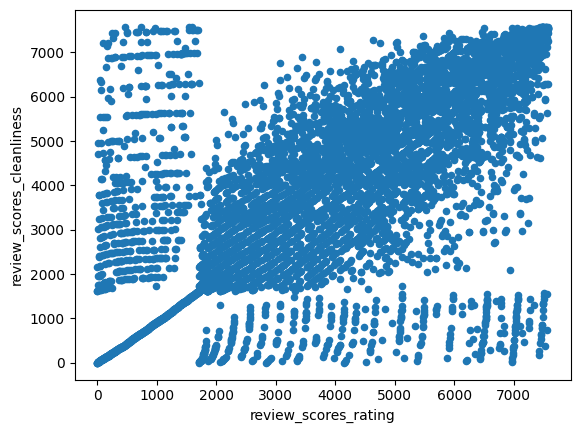

In [ ]:
# Visualize a scatter plot of the data
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64

Clustering_data.plot.scatter(x="review_scores_rating",
                                y="review_scores_cleanliness")
       

In [ ]:
# Start by importing the K-means algorithm
import sklearn
from sklearn.cluster import KMeans

In [ ]:
# Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=2, n_init='auto', random_state=1)

# Print the model
model

KMeans(n_clusters=2, n_init='auto', random_state=1)

In [ ]:
ClusterTest=Clustering_data[["review_scores_rating","review_scores_cleanliness"]]

In [ ]:
# Fit the data to the instance of the model
model.fit(ClusterTest)

KMeans(n_clusters=2, n_init='auto', random_state=1)

In [ ]:
# Make predictions about the data clusters using the trained model
customer_ratings = model.predict(ClusterTest)

# Print the predictions
print(customer_ratings)

[0 0 0 ... 1 1 1]


In [ ]:
# Create a copy of the DataFrame
service_rating_predictions_df = ClusterTest.copy()

# Add a column to the DataFrame that contains the customer_ratings information
service_rating_predictions_df['customer rating'] = customer_ratings

# Review the DataFrame
service_rating_predictions_df.head()

,review_scores_rating,review_scores_cleanliness,customer rating
5659,7537.0,7516.0,0
6938,7565.0,7552.0,0
5761,7386.0,7238.0,0
6727,7151.0,7291.0,0
3840,7438.0,7567.0,0


<Axes: xlabel='review_scores_rating', ylabel='review_scores_cleanliness'>

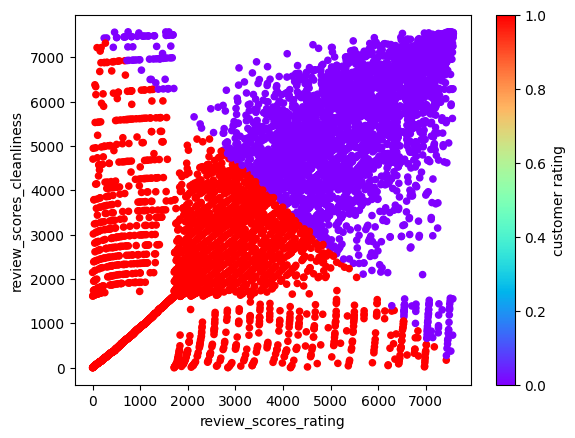

In [ ]:
# Plot the data points based on the customer rating
service_rating_predictions_df.plot.scatter(
    x="review_scores_rating", 
    y="review_scores_cleanliness",
    c="customer rating", 
    colormap='rainbow')

3.Kmeans to find what type of property be more instance bookable

In [ ]:
fileListing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
KMEAN_Data=fileListing[['property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price','instant_bookable']]
KMEAN_Data.drop_duplicates

KMEAN_updated=KMEAN_Data.fillna('0')
KMEAN_updated

,property_type,room_type,accommodates,bathrooms,bedrooms,price,instant_bookable
0,Private room in home,Private room,1,0,0,$43.00,f
1,Private room in home,Private room,2,0,0,$70.00,f
2,Private room in home,Private room,1,0,0,$42.00,f
3,Entire rental unit,Entire home/apt,2,0,0,$90.00,f
4,Private room in home,Private room,2,0,0,$38.00,f
...,...,...,...,...,...,...,...
8845,Room in hotel,Private room,2,0,0,$204.00,t
8846,Room in hotel,Private room,2,0,0,$204.00,t
8847,Room in hotel,Private room,2,0,0,$217.00,t
8848,Room in hotel,Private room,2,0,0,$217.00,t


In [ ]:
KMEAN_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   property_type     8850 non-null   object
 1   room_type         8850 non-null   object
 2   accommodates      8850 non-null   int64 
 3   bathrooms         8850 non-null   object
 4   bedrooms          8850 non-null   object
 5   price             8850 non-null   object
 6   instant_bookable  8850 non-null   object
dtypes: int64(1), object(6)
memory usage: 484.1+ KB


In [ ]:

KMEAN_updated['instant_bookable']

0       f
1       f
2       f
3       f
4       f
       ..
8845    t
8846    t
8847    t
8848    t
8849    f
Name: instant_bookable, Length: 8850, dtype: object

In [ ]:
KMEAN_Data['room_type'].value_counts()

room_type
Entire home/apt    7946
Private room        875
Hotel room           22
Shared room           7
Name: count, dtype: int64

In [ ]:
KMEAN_Data['property_type'].value_counts()


property_type
Entire home                           3310
Entire rental unit                    1664
Entire condo                          1073
Entire townhouse                       973
Private room in home                   369
Entire guest suite                     277
Room in hotel                          208
Entire guesthouse                      201
Entire loft                            127
Entire serviced apartment               96
Room in boutique hotel                  91
Private room in resort                  76
Entire bungalow                         59
Room in aparthotel                      38
Entire cottage                          37
Private room in townhouse               34
Private room in rental unit             31
Tiny home                               21
Private room in hostel                  20
Private room in guest suite             19
Private room                            14
Entire cabin                            14
Entire vacation home                    

In [ ]:
def encodeMethod(instant_bookable):

    if instant_bookable == "f":
        return 1
    else:
        return 2
def encodeRoom_type(room_type):

    if room_type == "Entire home/apt":
        return 1
    elif room_type == "Private room":
        return 2
    elif room_type == "Hotel room":
        return 3
    elif room_type == "Shared room":
        return 4
def encodeProperty_type(property_type):

    if property_type == "Entire home":
        return 1
    elif property_type == "Entire rental unit":
        return 2
    elif property_type == "Entire condo":
        return 3
    elif property_type == "Entire townhouse ":
        return 4
    elif property_type == "Private room in home ":
        return 5
    elif property_type == "Entire guest suite":
        return 6
    elif property_type == "Room in hotel  ":
        return 7
    elif property_type == "Entire guesthouse ":
        return 8
    elif property_type == "Entire loft ":
        return 9
    elif property_type == "Entire serviced apartment ":
        return 10
    elif property_type == "Room in boutique hotel":
        return 11
    elif property_type == "Private room in resort  ":
        return 12
    elif property_type == "Entire bungalow":
        return 13
    elif property_type == "Room in aparthotel":
        return 14
    else: 
        return 100

In [ ]:
# Edit the "instant_bookable" column using the encodeMethod function
KMEAN_updated['instant_bookable'] = KMEAN_updated['instant_bookable'].apply(encodeMethod)
KMEAN_updated['room_type'] = KMEAN_updated['room_type'].apply(encodeRoom_type)
KMEAN_updated['property_type'] = KMEAN_updated['property_type'].apply(encodeProperty_type)


In [ ]:
KMEAN_updated['room_type'].value_counts()

room_type
1    7946
2     875
3      22
4       7
Name: count, dtype: int64

In [ ]:
KMEAN_updated['room_type'] = KMEAN_updated['room_type'].replace([None, 'None'], 0)


# Alternative using to_numeric for better error handling
KMEAN_updated['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce').fillna(0).astype(int)

In [ ]:

KMEAN_updated.head(2)

,property_type,room_type,accommodates,bathrooms,bedrooms,price,instant_bookable
0,100,2,1,0,0,322.0,1
1,100,2,2,0,0,289.0,1


In [ ]:
# Initialize the K-Means model; n_clusters=2 and n_init='auto'
model_k2 = KMeans(n_clusters=2, n_init='auto')

In [ ]:
KMEAN_updated.fillna(0, inplace=True)

In [ ]:
# Fit the model
model_k2.fit(KMEAN_updated)

KMeans(n_clusters=2, n_init='auto')

In [ ]:
# Predict the model segments (clusters)
customer_segments_k2 = model_k2.predict(KMEAN_updated)

# View the customer segments
print(customer_segments_k2)

[0 0 0 ... 0 0 0]


In [ ]:
# Initialize the K-Means model; n_clusters=3 and n_init='auto'
model_k3 = KMeans(n_clusters=3, n_init='auto')

In [ ]:
# Fit the model
model_k3.fit(KMEAN_updated)

KMeans(n_clusters=3, n_init='auto')

In [ ]:
# Predict the model segments (clusters)
customer_segments_k3 = model_k3.predict(KMEAN_updated)

# View the customer segments
print(customer_segments_k3)

[2 2 2 ... 0 0 0]


In [ ]:

instant_bookable_predict = KMEAN_updated.copy()
# Create a new column in the DataFrame with the predicted clusters with k=2
instant_bookable_predict["Customer Segment (k=2)"] = customer_segments_k2

In [ ]:
# Create a new column in the DataFrame with the predicted clusters with k=3
instant_bookable_predict["Customer Segment (k=3)"] = customer_segments_k3

In [ ]:
instant_bookable_predict.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,price,instant_bookable,Customer Segment (k=2),Customer Segment (k=3)
0,100,2,1,0,0,322.0,1,0,2
1,100,2,2,0,0,289.0,1,0,2
2,100,2,1,0,0,333.0,1,0,2
3,2,1,2,0,0,75.0,1,0,0
4,100,2,2,0,0,220.0,1,0,2


<Axes: title={'center': 'Scatter Plot by room - k=2'}, xlabel='instant_bookable', ylabel='price'>

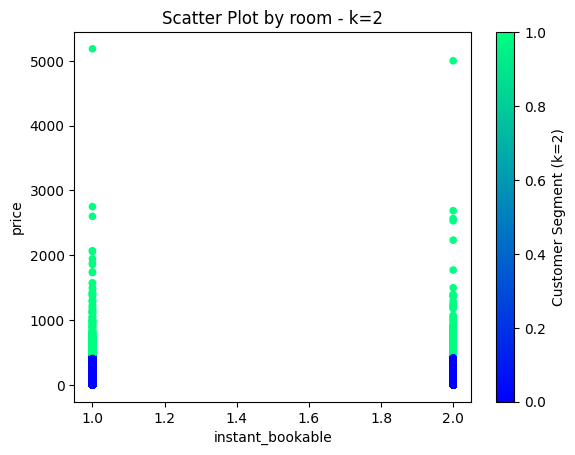

In [ ]:
# Create a scatter plot with x="instant_bookable" and y="price" with k=2 segments
instant_bookable_predict.plot.scatter(
    x="instant_bookable", 
    y="price", 
    c="Customer Segment (k=2)",
    title = "Scatter Plot by room - k=2",
    colormap='winter'
)

<Axes: title={'center': 'Scatter Plot by room type - k=3'}, xlabel='instant_bookable', ylabel='accommodates'>

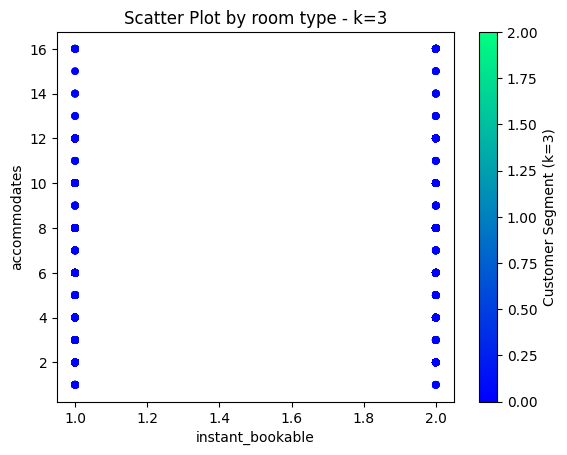

In [ ]:
# Create a scatter plot with x="instant_bookable" and y="accommodates" with k=3 segments
instant_bookable_predict.plot.scatter(
    x="instant_bookable", 
    y="accommodates", 
    c="Customer Segment (k=3)",
    title = "Scatter Plot by room type - k=3",
    colormap='winter'
)

In [ ]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(KMEAN_updated)
    inertia.append(model.inertia_)

In [ ]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,3.668477e+08
1,2,1.978402e+08
2,3,1.309723e+08
3,4,8.888274e+07
4,5,6.755175e+07
5,6,5.287391e+07
6,7,4.412870e+07
7,8,3.348565e+07
8,9,2.614094e+07
9,10,2.203445e+07


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

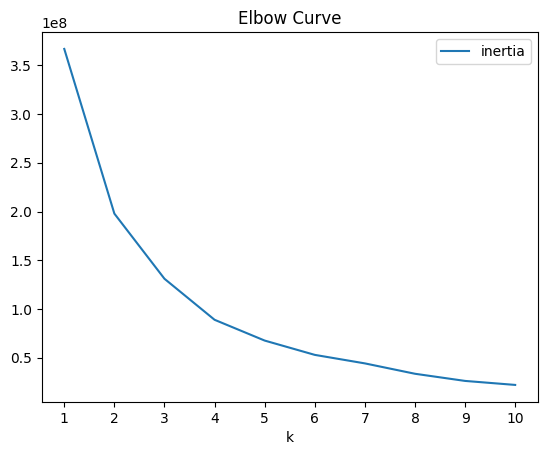

In [ ]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [ ]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 46.07%
Percentage decrease from k=2 to k=3: 33.80%
Percentage decrease from k=3 to k=4: 32.14%
Percentage decrease from k=4 to k=5: 24.00%
Percentage decrease from k=5 to k=6: 21.73%
Percentage decrease from k=6 to k=7: 16.54%
Percentage decrease from k=7 to k=8: 24.12%
Percentage decrease from k=8 to k=9: 21.93%
Percentage decrease from k=9 to k=10: 15.71%


In [ ]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(KMEAN_updated)

# Make predictions
k_4 = model.predict(KMEAN_updated)

# Create a copy of the DataFrame
instantBookable_predictions_df = KMEAN_updated.copy()

# Add a class column with the labels
instantBookable_predictions_df['book_segment'] = k_4

In [ ]:
instantBookable_predictions_df

,property_type,room_type,accommodates,bathrooms,bedrooms,price,instant_bookable,book_segment
0,100,2,1,0,0,322.0,1,1
1,100,2,2,0,0,289.0,1,1
2,100,2,1,0,0,333.0,1,1
3,2,1,2,0,0,75.0,1,0
4,100,2,2,0,0,220.0,1,1
...,...,...,...,...,...,...,...,...
8845,100,2,2,0,0,0.0,2,0
8846,100,2,2,0,0,0.0,2,0
8847,100,2,2,0,0,0.0,2,0
8848,100,2,2,0,0,0.0,2,0


<Axes: title={'center': 'Scatter Plot by instant bookable Segment - k=4'}, xlabel='instant_bookable', ylabel='price'>

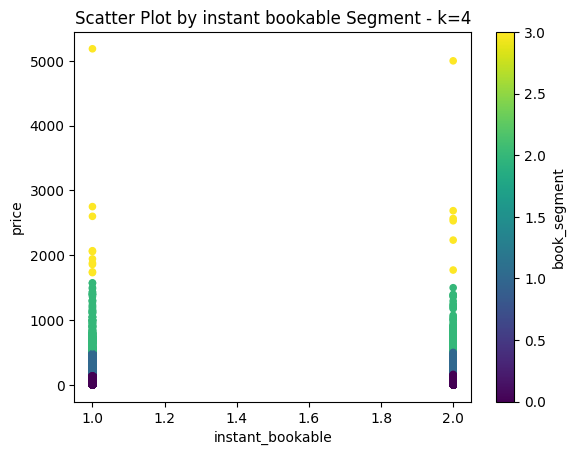

In [ ]:
instantBookable_predictions_df.plot.scatter(
    x="instant_bookable", 
    y="price", 
    c="book_segment",
    title = "Scatter Plot by instant bookable Segment - k=4",
    colormap='viridis'
)

4.Lr model evaluation

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
KMEAN_updated.columns
cleanK = KMEAN_updated[KMEAN_updated['room_type'] != 0]


In [ ]:
RoomTypeEvaluation=cleanK[['room_type','price']]
RoomTypeEvaluation.head()

,room_type,price
0,2,322.0
1,2,289.0
2,2,333.0
3,1,75.0
4,2,220.0


In [ ]:
X = RoomTypeEvaluation["price"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[322.],
       [289.],
       [333.],
       [ 75.],
       [220.]])

In [ ]:
X.shape

(8850, 1)

In [ ]:
# Create an array for the dependent variable y
y = RoomTypeEvaluation["price"]

In [ ]:
# Create a model with scikit-learn
model = LinearRegression()
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [ ]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

# Create a copy of the original data
RoomTypeEvaluation_predicted = RoomTypeEvaluation.copy()

# Add a column with the predicted salary values
RoomTypeEvaluation_predicted["price"] = predicted_y_values

# Display sample data
RoomTypeEvaluation_predicted.head()

,room_type,price
0,2,322.0
1,2,289.0
2,2,333.0
3,1,75.0
4,2,220.0


In [ ]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Compute the metrics for the linear regression model
score = round(model.score(X, y, sample_weight=None),5)
r2 = round(r2_score(y, predicted_y_values),5)
mse = round(mean_squared_error(y, predicted_y_values),4)
rmse = round(np.sqrt(mse),4)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The score is 1.0.
The r2 is 1.0.
The mean squared error is 0.0.
The root mean squared error is 0.0.


In [ ]:
def top_news_from_reuters():
    for article in articles:
        # NLTK tokenizes in similar way by using the `sent_tokenize` function
        sent_tokenize(article)
        # Print the first  sentence.
        sent = sent_tokenize(article)[0]
        print(sent)

        # Tokenize the first sentence with the `word_tokenize` function.
        word_tokenize(sent)
        # Import the spaCy library
        import spacy
        # Load the small English language model for spaCy
        nlp = spacy.load("en_core_web_sm")
        # Tokenize the first sentence using token.text
        spacy_sent = nlp(sent)
        [token.text for token in spacy_sent]
        # Tokenize the first sentence into subwords.
        sentence_subwords = tokenizer.tokenize(sent)
        print(f"the top related key words about agriculture here is {matching_categories}")
        return sent

In [ ]:
with gr.Blocks() as app:
    with gr.Row():
        param_dropdown = gr.Dropdown(choices=parameters, label="Select Parameter")
        weight_slider = gr.Slider(minimum=1, maximum=10, step=1, value=0, label="Set Weight")
        add_btn = gr.Button("Add Parameter")
        remove_btn = gr.Button("Remove Parameter")
    
    output_text = gr.Textbox(label="Parameters and Weights", lines=10)
    
    # Setup event handlers
    add_btn.click(fn=add_parameter, inputs=[param_dropdown, weight_slider], outputs=output_text)
    remove_btn.click(fn=remove_parameter, inputs=param_dropdown, outputs=output_text)
    
    gr.Markdown("## Step 2: Process Data Based on Selected Criteria")
    with gr.Row():
        min_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=10, label="Minimum Value")
        max_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=5186, label="Maximum Value")
    process_btn = gr.Button("Process Data")
    result_output = gr.HTML(label="Best Options Based on Average Rank")


    process_btn.click(fn=process_data, inputs=[min_slider,max_slider], outputs=result_output)

    gr.Markdown("## Step 3: Find Listings")
    accommodates_input = gr.Number(label="Accommodates")
    price_input = gr.Number(label="Price")
    find_btn = gr.Button("Find Listings")
    listings_output = gr.Textbox(label="Listings")
    find_btn.click(fn=answer_questions, inputs=[accommodates_input, price_input], outputs=listings_output)  

    gr.Markdown("## Step 4: Select from the Suggested List")
    
    dropdown = gr.Dropdown(choices=choiceList)
    
    output_text = gr.Textbox()
    dropdown.change(Choice, inputs=dropdown, outputs=output_text)

    gr.Markdown("#Step 5 map the searched list")
    
    map_output = gr.HTML(show_map())

    gr.Markdown("## Step 6: Get the Weather")
    
    weather_btn = gr.Button("Weather Button")
    weather_output = gr.Textbox(label="weather")
    weather_btn.click(fn=final_weatherInfo, inputs=[], outputs=weather_output) 

    gr.Markdown("## Step 7: Get the weekly Weather")
    
    week_weather_btn = gr.Button("Week Weather Button")
    week_weather_output = gr.Textbox(label="weekly weather")
    week_weather_btn.click(fn=get_weekly_weather, inputs=[], outputs=week_weather_output)
app.launch('share=True')

Running on local URL:  http://127.0.0.1:7908

To create a public link, set `share=True` in `launch()`.


In [ ]:
row

,id,listing_url,latitude,longitude
376,10902213,https://www.airbnb.com/rooms/10902213,36.149220,-86.794110
263,7692199,https://www.airbnb.com/rooms/7692199,36.126430,-86.792990
305,8734371,https://www.airbnb.com/rooms/8734371,36.163635,-86.780869


In [ ]:
theme1 = gr.themes.Soft(
    primary_hue="sky",
    secondary_hue="red",
    radius_size="lg",
)

interface = gr.TabbedInterface([AirBnbSelction,Map_Weather], [ "Please Select one","Map and Weather"], theme=theme1)

#if __name__ ==  '__main__':
 #   interface.launch(debug=True)
for tab_title in interface.blocks:
    interface.launch( debug=True)
    input("Press Enter to continue to the next tab...")

OSError: Cannot find empty port in range: 7860-7959. You can specify a different port by setting the GRADIO_SERVER_PORT environment variable or passing the `server_port` parameter to `launch()`.

In [ ]:

with gr.Blocks() as app:
    with gr.Row():
        param_dropdown = gr.Dropdown(choices=parameters, label="Select Parameter")
        weight_slider = gr.Slider(minimum=1, maximum=10, step=1, value=0, label="Set Weight")
        add_btn = gr.Button("Add Parameter")
        remove_btn = gr.Button("Remove Parameter")
    
    output_text = gr.Textbox(label="Parameters and Weights", lines=10)
    
    # Setup event handlers
    add_btn.click(fn=add_parameter, inputs=[param_dropdown, weight_slider], outputs=output_text)
    remove_btn.click(fn=remove_parameter, inputs=param_dropdown, outputs=output_text)
    
    gr.Markdown("## Step 2: Process Data Based on Selected Criteria")
    with gr.Row():
        min_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=10, label="Minimum Value")
        max_slider = gr.Slider(minimum=10, maximum=5186, step=1, value=5186, label="Maximum Value")
    process_btn = gr.Button("Process Data")
    result_output = gr.HTML(label="Best Options Based on Average Rank")


    process_btn.click(fn=process_data, inputs=[min_slider,max_slider], outputs=result_output)

    gr.Markdown("## Step 3: Find Listings")
    accommodates_input = gr.Number(label="Accommodates")
    price_input = gr.Number(label="Price")
    find_btn = gr.Button("Find Listings")
    listings_output = gr.Textbox(label="Listings")
    find_btn.click(fn=answer_questions, inputs=[accommodates_input, price_input], outputs=listings_output)  

    gr.Markdown("## Step 4: Select from the Suggested List")

    dropdown = gr.Dropdown(choices=dataframe_to_list(df))
    output_text = gr.Textbox()
    dropdown.change(handle_selection, inputs=dropdown, outputs=output_text)

    gr.Markdown("#Step 5 map the searched list")
    
    map_output = gr.HTML(show_map())

    gr.Markdown("## Step 6: Get the Weather")
    
    weather_btn = gr.Button("Weather Button")
    weather_output = gr.Textbox(label="weather")
    weather_btn.click(fn=final_weatherInfo, inputs=[], outputs=weather_output) 

    gr.Markdown("## Step 7: Get the weekly Weather")
    
    week_weather_btn = gr.Button("Week Weather Button")
    week_weather_output = gr.Textbox(label="weekly weather")
    week_weather_btn.click(fn=get_weekly_weather, inputs=[], outputs=week_weather_output)

    gr.Markdown("## Step 8: Activity Suggestion")
    
    act_btn = gr.Button("Activity Suggestion Button")
    act_output = gr.Textbox(label="Activity")
    act_btn.click(fn=Activity_Planner, inputs=[], outputs=act_output)    

    gr.Markdown("## Step 9: Agriculture Introduction")
    
    agr_btn = gr.Button("Agriculture Introduction")
    agr_output = gr.Textbox(label="Agriculture Product")
    agr_btn.click(fn=Agr_Investigation, inputs=[], outputs=agr_output)
      
    gr.Markdown("## Step 10: Agriculture News")
    
    agrNews_btn = gr.Button("Agriculture News")
    agrNews_output = gr.Textbox(label="Agriculture News")
    agrNews_btn.click(fn=top_news_from_reuters, inputs=[], outputs=agrNews_output)    
app.launch('share=True')

NameError: name 'top_news_from_reuters' is not defined